# Nitrate correlation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'ticks', font_scale = 1.5)

%matplotlib inline

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)


## Data_preprocess

In [2]:
df = pd.read_csv('data/WQ All wells.csv', encoding = 'cp949')
df.copy()
df['Date'] = df['Date'].astype('datetime64[D]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18647 entries, 0 to 18646
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Station         18647 non-null  object        
 1   Date            18647 non-null  datetime64[ns]
 2   Sample Type     18647 non-null  object        
 3   Analyte         18647 non-null  object        
 4   Value           18623 non-null  float64       
 5   Qualifier Code  7548 non-null   object        
 6   Unit            18647 non-null  object        
 7   Matrix Name     18647 non-null  object        
 8   Major Type      18647 non-null  object        
 9   Minor Type      18647 non-null  object        
 10  Lab Status      18647 non-null  object        
 11  Comments        2271 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 1.7+ MB


## M-0779, M-0780, M-0781 비교
* M-0781, M-0780은 정화능력이 있는 well로 보여진다. 반면 M-0779는 정화능력이 없는 Well로 보여진다.

In [3]:
df = df[(df['Station'] == 'M-0779') | (df['Station'] == 'M-0780') | (df['Station'] == 'M-0781')]
df

,Station,Date,Sample Type,Analyte,Value,Qualifier Code,Unit,Matrix Name,Major Type,Minor Type,Lab Status,Comments
10605,M-0779,2015-01-22,GRAB,Ag-T,0.079575,T,ug/L,WATER,Ambient,None,Historical/Archived,NaN
10606,M-0779,2015-01-22,GRAB,Al-T,43.259170,NaN,ug/L,WATER,Ambient,None,Historical/Archived,NaN
10607,M-0779,2015-01-22,GRAB,Alkalinity,307.193024,NaN,mg/L,WATER,Ambient,None,Historical/Archived,NaN
10608,M-0779,2015-01-22,GRAB,As-T,-2.261812,T,ug/L,WATER,Ambient,None,Historical/Archived,NaN
10609,M-0779,2015-01-22,GRAB,Ba-T,27.478300,NaN,ug/L,WATER,Ambient,None,Historical/Archived,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11749,M-0781,2016-12-07,GRAB,V-T,1.061327,I,ug/L,WATER,Ambient,None,Provisional,NaN
11750,M-0781,2016-12-07,GRAB,Water Level DTW-ft < Measuring Point,23.820000,NaN,ft,FIELD DATA,Ambient,None,Provisional,NaN
11751,M-0781,2016-12-07,GRAB,Water Temp,22.060000,NaN,deg C,FIELD DATA,Ambient,None,Provisional,NaN
11752,M-0781,2016-12-07,GRAB,Zn-T,2.869294,T,ug/L,WATER,Ambient,None,Provisional,NaN


In [4]:
train = pd.pivot_table(df, index = ['Date', 'Station'], columns = 'Analyte', values = 'Value')
train.reset_index(inplace = True)

### PCA with NOx-T concentration

In [5]:
index_list = df['Analyte'].value_counts().to_frame()
index_list = index_list[index_list['Analyte'] == 24]
index_list = index_list.index.tolist()
index_list

['Cl',
 'TDS',
 'pH-Field',
 'Mn-T',
 'Ba-T',
 'Conductivity',
 'DO',
 'Water Temp',
 'Cd-T',
 'Alkalinity',
 'TP-T',
 'Ni-T',
 'K-T',
 'Cr-T',
 'PO4-T',
 'DO-Percent Oxygen Saturation',
 'Al-T',
 'TOC',
 'As-T',
 'NOx-T',
 'Zn-T',
 'Mg-T',
 'Mo-T',
 'Water Level DTW-ft < Measuring Point',
 'Ca-T',
 'Pb-T',
 'Sr-T',
 'NH4-T',
 'Conductivity-Field',
 'TKN-T',
 'Se-T',
 'Na-T',
 'Cu-T',
 'Ag-T',
 'Hardness Calculated Ca+Mg',
 'SO4',
 'Fe-T']

In [6]:
train['PO4-T'].isnull().sum()
train['PO4-T'].fillna(train['PO4-T'].mean(), inplace = True)

In [7]:
X = train[index_list]
Y = train[['Station']]

In [8]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std[:3]

array([[-0.20976926, -0.15900042,  0.77533456, -0.81993886, -1.35657236,
        -0.18756528, -0.07738232,  1.1559542 ,  3.8166698 , -0.49406031,
        -0.36876232, -2.21716986, -0.34244752,  0.10893409, -1.18170655,
        -0.06300575, -0.352993  , -0.17740278, -2.17375141,  0.1287276 ,
         0.34251529,  1.66481151,  0.03598264, -0.30779664, -0.79010995,
         0.79398526,  1.31879472, -0.02382072,  0.01624845, -0.16395407,
        -3.59940391,  1.15185547, -0.31179035,  0.4056216 , -0.45768458,
         0.20065697, -0.69952407],
       [-0.56431037, -0.69427784,  0.77533456, -0.31744903,  0.4261147 ,
        -1.19224022, -0.07738232, -0.14915538, -0.40587778, -0.7485347 ,
         3.0925616 , -0.86141198,  1.97907519,  2.75262994,  2.91453692,
        -0.06300575,  2.9835894 ,  0.41090193, -1.52899948, -0.96036346,
         0.00685294, -0.79387987,  0.12762723, -0.37995409, -0.96775692,
        -2.14480303, -0.82957763,  1.57985728, -1.10776181,  2.11957667,
        -2.31135

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(x_std)
pc[:3]

array([[-2.68491327, -2.97096982],
       [-2.53785063,  5.9279519 ],
       [ 5.43051308, -0.20396369]])

In [10]:
pc_y = np.c_[pc, Y]
df_pca = pd.DataFrame(pc_y, columns = ['PC1', 'PC2', 'Station'])
df_pca.head()

,PC1,PC2,Station
0,-2.68491,-2.97097,M-0779
1,-2.53785,5.92795,M-0780
2,5.43051,-0.203964,M-0781
3,-2.42177,-2.68615,M-0779
4,-2.54355,4.02386,M-0780


In [11]:
coeff = np.transpose(pca.components_[:2])

In [12]:
df_coeff = pd.DataFrame(coeff, columns = ['PC1', 'PC2'])
df_coeff['Columns'] = 0
df_coeff['Columns'] = X.columns
df_coeff.style.bar(subset = ['PC1', 'PC2'], align = 'mid', color = ['#d65f5f', '#5fba7d'])


,PC1,PC2,Columns
0,0.135708,-0.028627,Cl
1,0.206903,-0.028566,TDS
2,-0.244828,-0.021825,pH-Field
3,0.249397,0.058437,Mn-T
4,0.162509,0.273664,Ba-T
5,0.227180,-0.158180,Conductivity
6,0.178259,0.000634,DO
7,-0.175200,-0.186852,Water Temp
8,0.017383,-0.094075,Cd-T
9,0.247751,-0.010513,Alkalinity


In [13]:
pca_val = pca.explained_variance_ratio_
pca_val
pc1_eig = pca_val[0]*100
pc2_eig = pca_val[1]*100
n = df_coeff.shape[0]

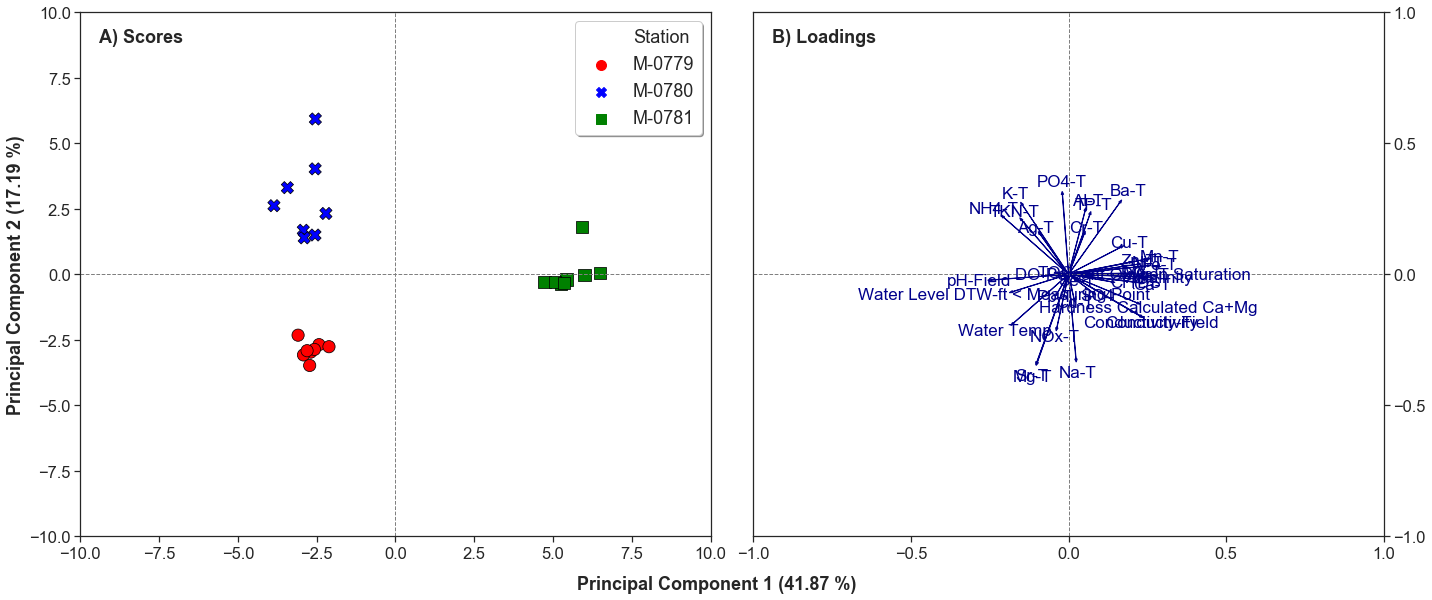

In [14]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from matplotlib_colorbar.colorbar import Colorbar
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, figsize = (20, 8))


#axins = inset_axes(ax, width='50%', height='50%', loc= 'upper right') 
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca, hue = 'Station', s = 150, edgecolor="black", style = 'Station',
                palette = ['red', 'blue', 'green'], legend = 'full', ax = ax[0])

lgnd = ax[0].legend(scatterpoints=1, fontsize=18, shadow = True)

for handle in lgnd.legendHandles:
    handle.set_sizes([100])


ax[0].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[0].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)

for i in range(n) :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkblue', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkblue', ha = 'center', va = 'center', fontsize = 17)

"""    
for i in N :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkred', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkred', ha = 'center', va = 'center', fontsize = 17)
"""
    
ax[0].set_xlabel('')
#ax[0].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
#ax[1].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
ax[0].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
#ax[1].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
    
ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-10, 10)
ax[1].set_xlim(-1, 1, 0.5)
ax[1].set_ylim(-1, 1)

ax[1].set_xticks([-1, -.5, 0, .5, 1])
ax[1].set_yticks([-1, -.5, 0, .5, 1])

ax[0].text(-9.4, 9.4, 'A) Scores', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[1].text(-.94, .94, 'B) Loadings', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

#ax[0].arrow(-3.5, -7, 7.5, 0, color = 'darkred', head_width = 0.5, width = 0.01)
#ax[0].text(-1.2, -6.8, 'Nitrification', weight = 'bold', fontsize = 20, color = 'darkred')

fig.text(0.5, -.03, 'Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18, ha='center')
#plt.text(.35, .9, 'Permeability ($10^{-18}$ m/s)') #fontsize = 15)

plt.tight_layout()
#plt.savefig('Nitrification_new_1', dpi=1000,  ext='png', bbox_inches="tight")


## Result

* PC2 축을 기준으로 밑으로 갈수록 Nitrate의 영향을 받는것을 볼수가있다.

* 그러면 PC2축에 영향을 많이 주는 요소를 뽑아 요소간의 관계를 보면 어떨까?


## Heatmap of PC2

In [15]:
df_coeff.sort_values(by = 'PC2', ascending = False, inplace = True)
df_coeff.style.bar(subset = ['PC1', 'PC2'], align = 'mid', color = ['#d65f5f', '#5fba7d'])

,PC1,PC2,Columns
14,-0.019518,0.304658,PO4-T
4,0.162509,0.273664,Ba-T
12,-0.146590,0.264870,K-T
16,0.052502,0.242749,Al-T
10,0.067456,0.228284,TP-T
27,-0.205999,0.217295,NH4-T
29,-0.148011,0.206190,TKN-T
13,0.049279,0.153644,Cr-T
33,-0.090282,0.152935,Ag-T
32,0.165213,0.103037,Cu-T


* 절대값이 0.2보다 높은 row만 색출

In [16]:
df_coeff = df_coeff[(df_coeff['PC2'] >= 0.2) | (df_coeff['PC2'] <= -.2)]
df_coeff.style.bar(subset = ['PC1', 'PC2'], align = 'mid', color = ['#d65f5f', '#5fba7d'])

,PC1,PC2,Columns
14,-0.019518,0.304658,PO4-T
4,0.162509,0.273664,Ba-T
12,-0.146590,0.264870,K-T
16,0.052502,0.242749,Al-T
10,0.067456,0.228284,TP-T
27,-0.205999,0.217295,NH4-T
29,-0.148011,0.206190,TKN-T
19,-0.037257,-0.204422,NOx-T
31,0.023489,-0.323314,Na-T
26,-0.100391,-0.334388,Sr-T


In [17]:
df_coeff['Columns'].tolist()

['PO4-T',
 'Ba-T',
 'K-T',
 'Al-T',
 'TP-T',
 'NH4-T',
 'TKN-T',
 'NOx-T',
 'Na-T',
 'Sr-T',
 'Mg-T']

In [19]:
df_pc2 = train[df_coeff['Columns'].tolist()] 
df_pc2['Station'] = 0
df_pc2['Station'] = train['Station']
df_pc2['Depth'] = 0
df_pc2['Depth'] = df_pc2['Station'].apply(lambda x: 10 if x == 'M-0781' else 20 if x == 'M-0780' else 50)
df_pc2

D:\Teddy\Application\Anaconda\envs\teddy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Teddy\Application\Anaconda\envs\teddy\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Teddy\Application\Anaconda\envs\teddy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Analyte,PO4-T,Ba-T,K-T,Al-T,TP-T,NH4-T,TKN-T,NOx-T,Na-T,Sr-T,Mg-T,Station,Depth
0,0.014800,27.478300,1.891481,43.259170,0.0367,0.187651,0.2358,0.0085,29.620170,1663.301000,16.693740,M-0779,50
1,0.060300,141.282700,7.659688,466.269500,0.1351,0.317570,0.5013,0.0036,17.957340,338.563900,5.284369,M-0780,20
2,0.026600,163.006300,0.598132,32.485950,0.0546,0.104706,0.1829,0.0009,25.700190,443.503400,6.122833,M-0781,10
3,0.024900,25.686352,1.933598,33.755326,0.0283,0.181323,0.2202,0.0131,28.014438,1805.008623,15.472806,M-0779,50
4,0.051000,132.375961,9.799973,263.287044,0.0807,0.304103,0.4146,0.0096,17.811376,346.666093,5.037871,M-0780,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.019600,145.869461,2.544296,16.208219,0.0259,0.286579,0.3536,0.0017,9.582088,371.014752,5.177999,M-0780,20
20,0.041100,181.002830,0.717146,463.820622,0.0657,0.090484,0.2409,0.0061,20.518284,517.574621,6.214637,M-0781,10
21,0.020600,26.067613,2.148439,7.999176,0.0181,0.174788,0.2498,0.0115,33.488539,1672.773284,16.503044,M-0779,50
22,0.027300,149.598375,1.927464,28.466833,0.0216,0.285342,0.3938,0.0082,9.289926,372.823655,5.909838,M-0780,20


In [62]:
df_pc2.sort_values(by = 'Depth', ascending = False)

Analyte,PO4-T,Ba-T,K-T,Al-T,TP-T,NH4-T,TKN-T,NOx-T,Na-T,Sr-T,Mg-T,Station,Depth
0,0.014800,27.478300,1.891481,43.259170,0.0367,0.187651,0.2358,0.0085,29.620170,1663.301000,16.693740,M-0779,50
6,0.024800,26.516120,1.980640,29.819003,0.0277,0.172222,0.2507,0.0080,26.735306,1798.265608,14.529795,M-0779,50
21,0.020600,26.067613,2.148439,7.999176,0.0181,0.174788,0.2498,0.0115,33.488539,1672.773284,16.503044,M-0779,50
18,0.019200,25.758847,2.121680,6.692357,0.0243,0.181150,0.2444,0.0065,28.383028,1744.394724,14.681853,M-0779,50
15,0.023600,25.758166,2.029770,10.976290,0.0215,0.178224,0.2509,0.0151,30.221869,1740.397694,14.478681,M-0779,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.023300,175.207978,0.838780,101.846590,0.0474,0.091564,0.2133,0.0176,21.710597,449.710496,6.382704,M-0781,10
20,0.041100,181.002830,0.717146,463.820622,0.0657,0.090484,0.2409,0.0061,20.518284,517.574621,6.214637,M-0781,10
2,0.026600,163.006300,0.598132,32.485950,0.0546,0.104706,0.1829,0.0009,25.700190,443.503400,6.122833,M-0781,10
5,0.030900,155.470892,0.817607,142.539913,0.0669,0.099761,0.1875,0.0077,22.285856,493.556186,6.164516,M-0781,10


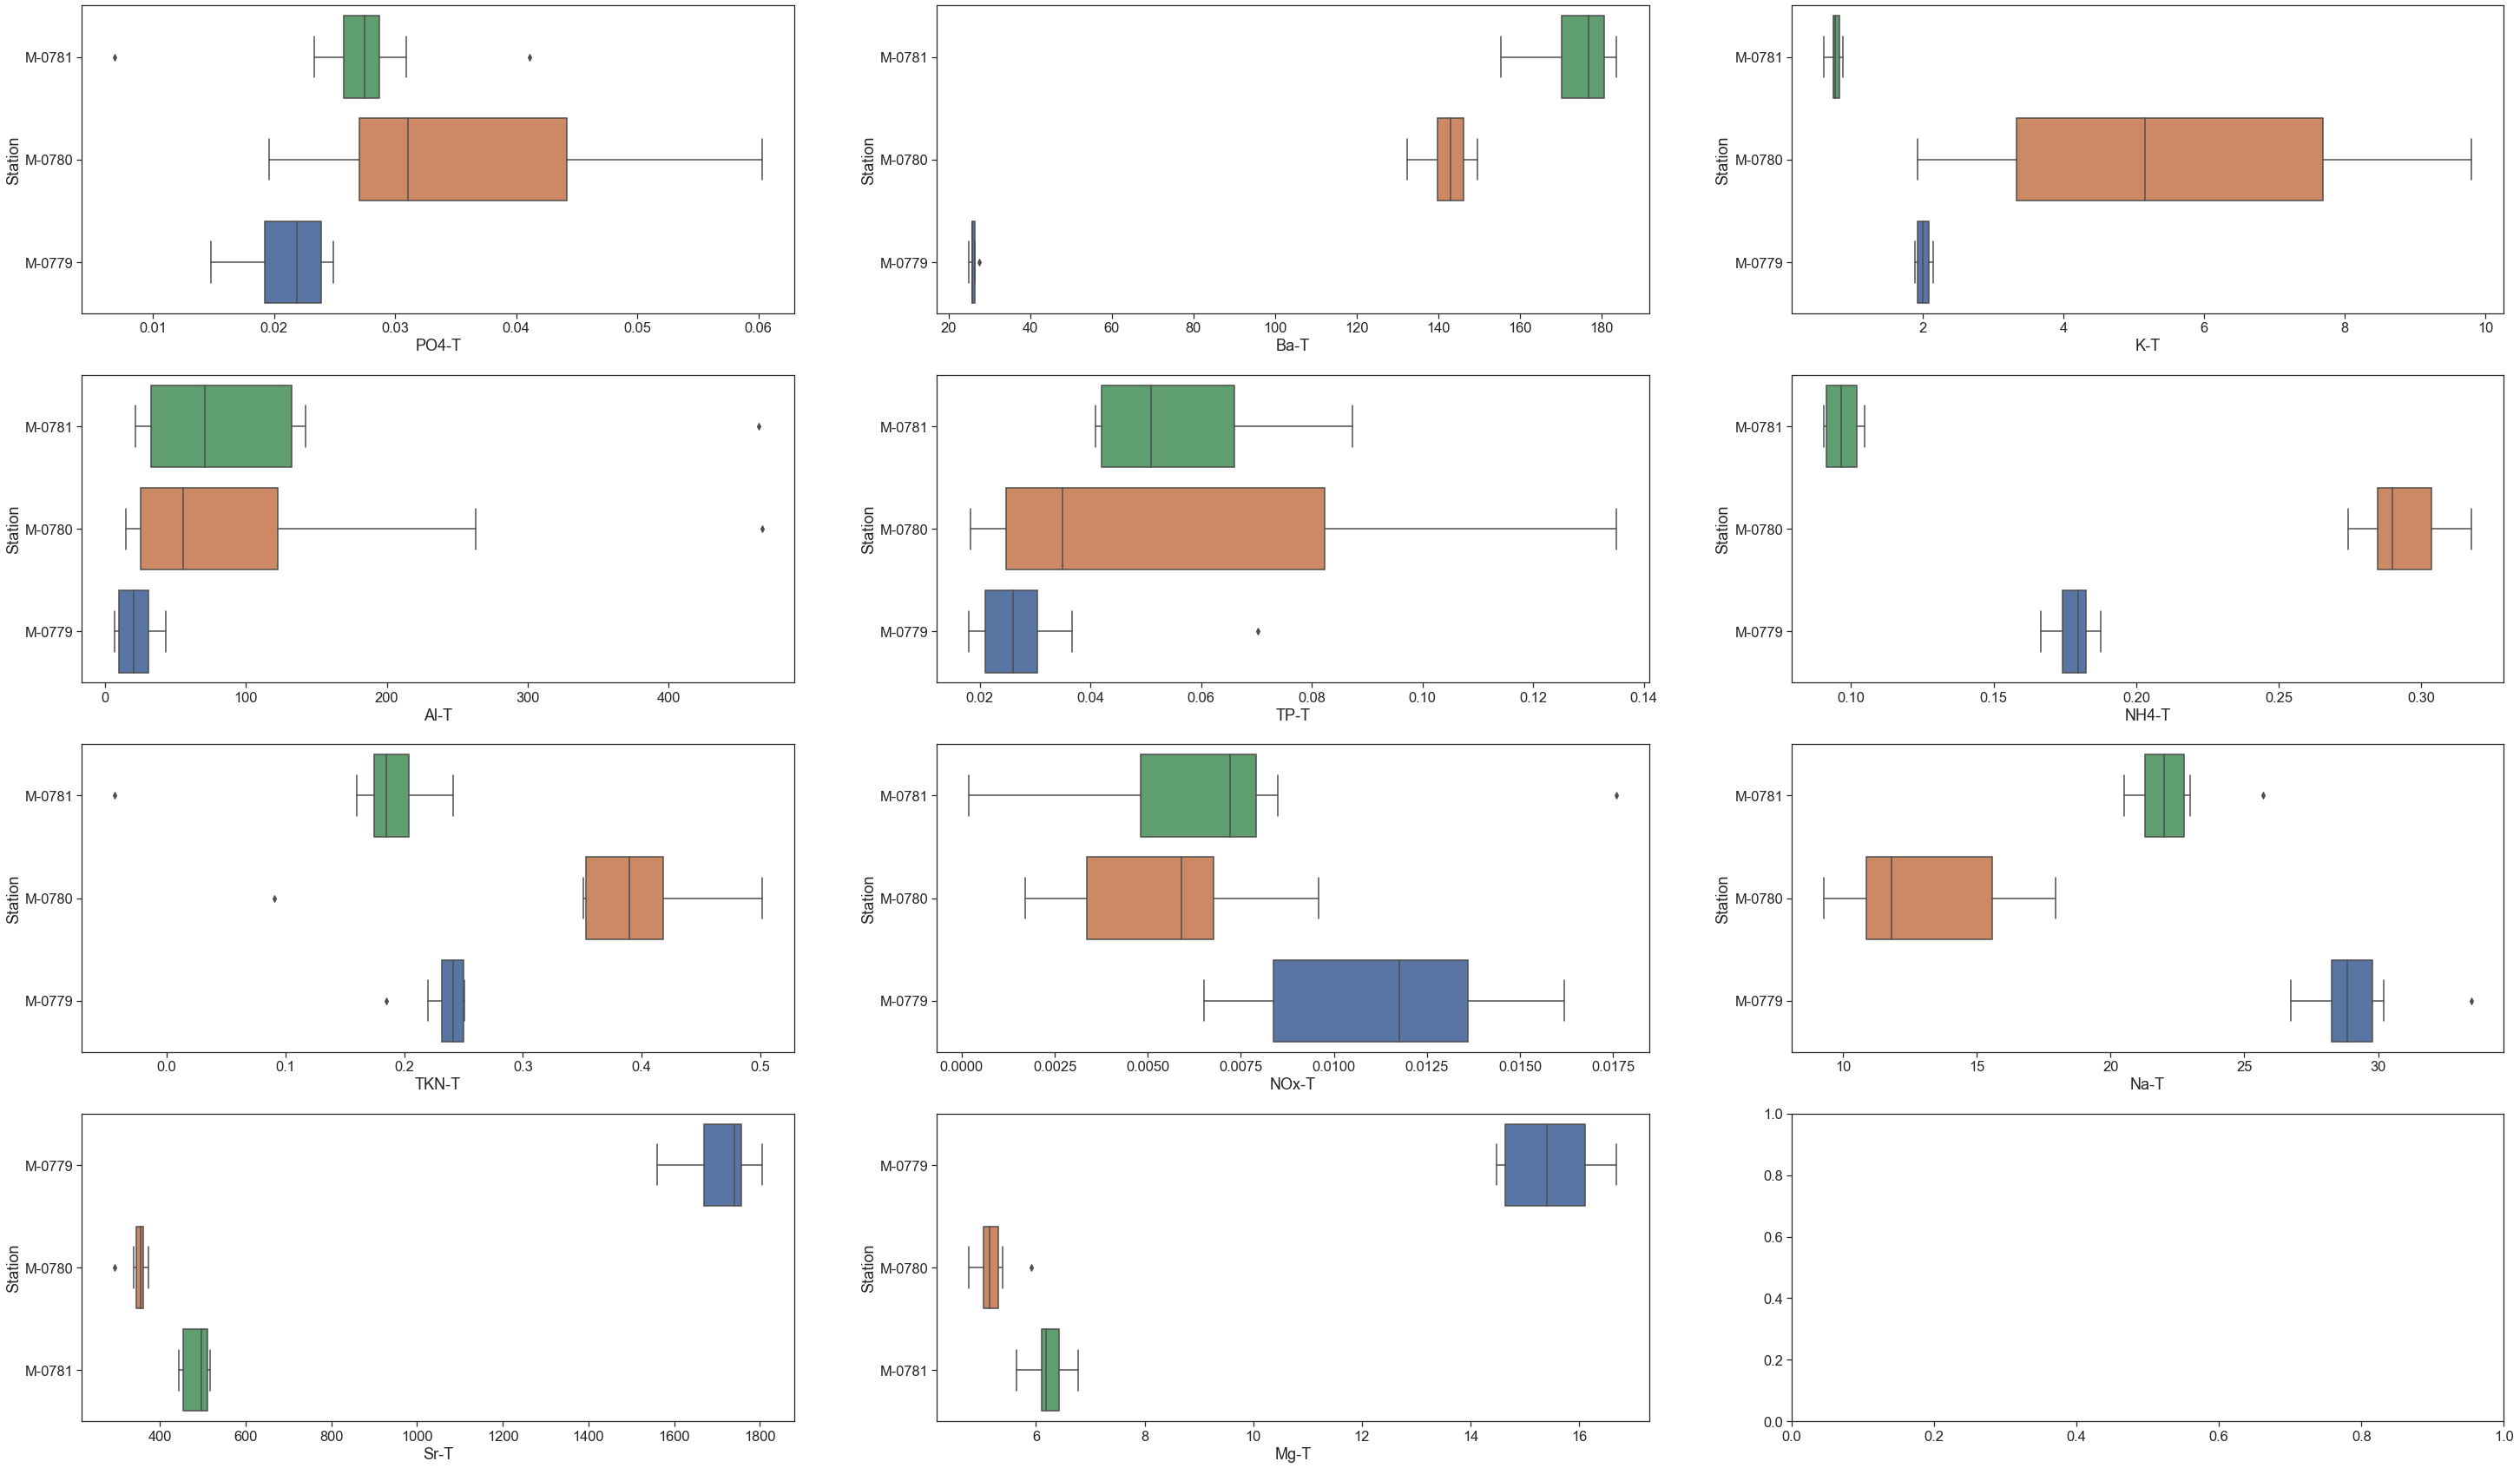

In [70]:
fig, ax = plt.subplots(4, 3, figsize = (50, 30))

i = [0, 1, 2]
j = [0, 1, 2]

sns.boxplot(y = 'Station', x = 'PO4-T', data = df_pc2, orient = 'h', ax = ax[0, 0])
sns.boxplot(y = 'Station', x = 'Ba-T', data = df_pc2, orient = 'h', ax = ax[0, 1])
sns.boxplot(y = 'Station', x = 'K-T', data = df_pc2, orient = 'h', ax = ax[0, 2])
sns.boxplot(y = 'Station', x = 'Al-T', data = df_pc2, orient = 'h', ax = ax[1, 0])
sns.boxplot(y = 'Station', x = 'TP-T', data = df_pc2, orient = 'h', ax = ax[1, 1])
sns.boxplot(y = 'Station', x = 'NH4-T', data = df_pc2, orient = 'h', ax = ax[1, 2])
sns.boxplot(y = 'Station', x = 'TKN-T', data = df_pc2, orient = 'h', ax = ax[2, 0])
sns.boxplot(y = 'Station', x = 'NOx-T', data = df_pc2, orient = 'h', ax = ax[2, 1])
sns.boxplot(y = 'Station', x = 'Na-T', data = df_pc2, orient = 'h', ax = ax[2, 2])
sns.boxplot(y = 'Station', x = 'Sr-T', data = df_pc2, orient = 'h', ax = ax[3, 0])
sns.boxplot(y = 'Station', x = 'Mg-T', data = df_pc2, orient = 'h', ax = ax[3, 1])



for a in i :
    for b in j :
        ax[a, b].invert_yaxis()
        
        